In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
df.head()
# top 5 rows

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.rename(columns={'yrs.since.phd':'yrs_since_phd','yrs.service':'yrs_service'},inplace=True)
# renaming particular column name we want to change

In [5]:
df.columns
# columns title name

Index(['rank', 'discipline', 'yrs_since_phd', 'yrs_service', 'sex', 'salary'], dtype='object')

In [6]:
df.tail()
# bottom 5 rows

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()
# description of data

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
df.shape
# rows and columns

(397, 6)

In [9]:
df.isnull()
# checking for null values

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [10]:
df.isnull().sum()
# counting of null values

rank             0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [11]:
df.dtypes
# data types

rank             object
discipline       object
yrs_since_phd     int64
yrs_service       int64
sex              object
salary            int64
dtype: object

In [12]:
column_values = df[['rank']]. values. ravel()
unique_values = pd. unique(column_values)
unique_values

# checking for unique values

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [13]:
column_values = df[['discipline']]. values. ravel()
unique_values = pd. unique(column_values)
unique_values

# checking for unique values

array(['B', 'A'], dtype=object)

In [14]:
column_values = df[['sex']]. values. ravel()
unique_values = pd. unique(column_values)
unique_values

# checking for unique values

array(['Male', 'Female'], dtype=object)

In [15]:
def tran_rank(x):
    if x == 'Prof':
        return 1
    if x == 'AsstProf':
        return 2
    if x == 'AssocProf':
        return 3

In [16]:
df['rank']=df['rank'].apply(tran_rank)
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,1,B,19,18,Male,139750
1,1,B,20,16,Male,173200
2,2,B,4,3,Male,79750
3,1,B,45,39,Male,115000
4,1,B,40,41,Male,141500
...,...,...,...,...,...,...
392,1,A,33,30,Male,103106
393,1,A,31,19,Male,150564
394,1,A,42,25,Male,101738
395,1,A,25,15,Male,95329


In [17]:
def tran_discipline(x):
    if x == 'A':
        return 0
    if x == 'B':
        return 1

In [18]:
df['discipline']=df['discipline'].apply(tran_discipline)
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,1,1,19,18,Male,139750
1,1,1,20,16,Male,173200
2,2,1,4,3,Male,79750
3,1,1,45,39,Male,115000
4,1,1,40,41,Male,141500
...,...,...,...,...,...,...
392,1,0,33,30,Male,103106
393,1,0,31,19,Male,150564
394,1,0,42,25,Male,101738
395,1,0,25,15,Male,95329


In [19]:
def tran_sex(x):
    if x == 'Male':
        return 0
    if x == 'Female':
        return 1

In [20]:
df['sex']=df['sex'].apply(tran_sex)
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,1,1,19,18,0,139750
1,1,1,20,16,0,173200
2,2,1,4,3,0,79750
3,1,1,45,39,0,115000
4,1,1,40,41,0,141500
...,...,...,...,...,...,...
392,1,0,33,30,0,103106
393,1,0,31,19,0,150564
394,1,0,42,25,0,101738
395,1,0,25,15,0,95329


In [21]:
df.head(10)

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,1,1,19,18,0,139750
1,1,1,20,16,0,173200
2,2,1,4,3,0,79750
3,1,1,45,39,0,115000
4,1,1,40,41,0,141500
5,3,1,6,6,0,97000
6,1,1,30,23,0,175000
7,1,1,45,45,0,147765
8,1,1,21,20,0,119250
9,1,1,18,18,1,129000


In [22]:
df.corr()
# correlation

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
rank,1.000000,0.086266,-0.525500,-0.447499,0.132492,-0.522207
discipline,0.086266,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs_since_phd,-0.525500,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs_service,-0.447499,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,0.132492,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,-0.522207,0.156084,0.419231,0.334745,-0.138610,1.000000


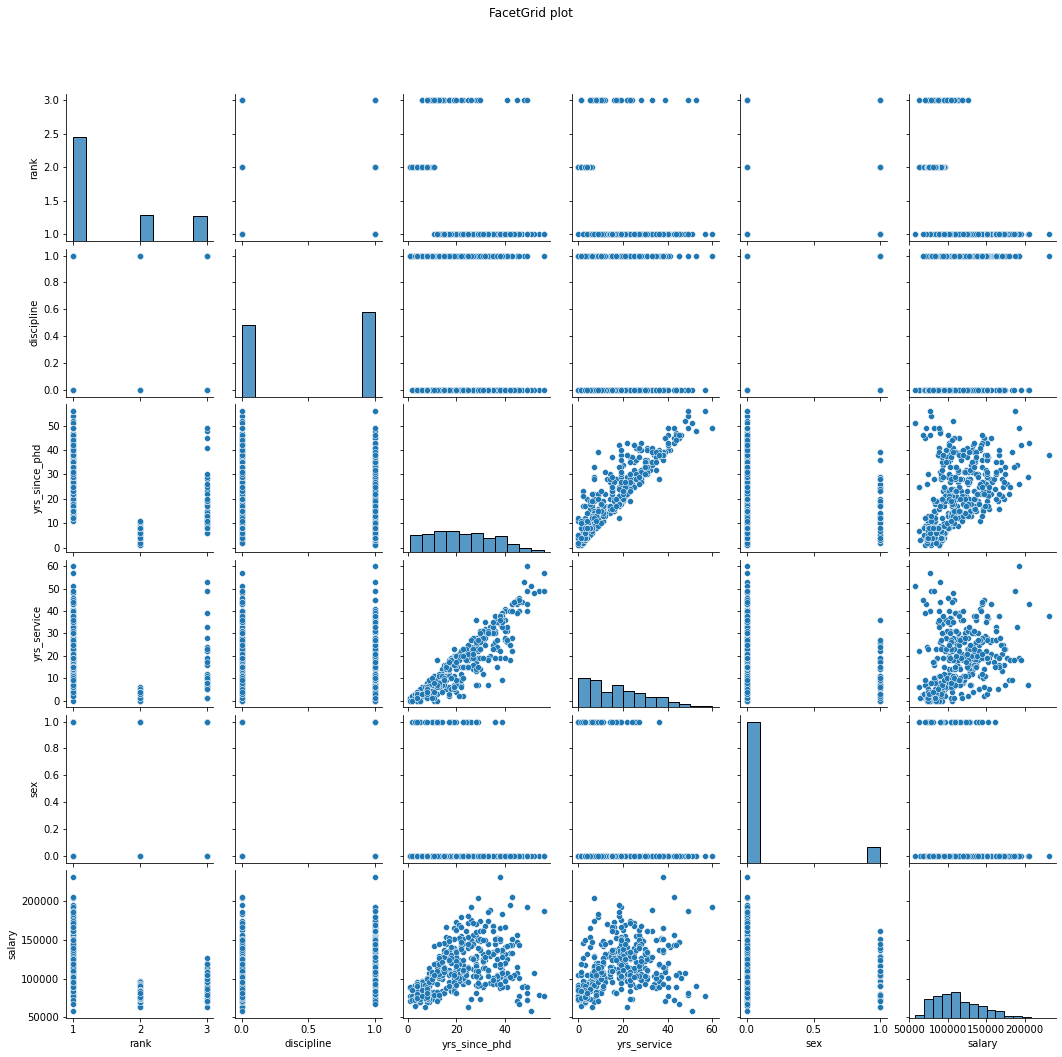

In [23]:
plot = sns.pairplot(df)
plot.fig.suptitle('FacetGrid plot', fontsize = 12)
plot.fig.subplots_adjust(top= 0.9)

In [24]:
######

In [25]:
reg=linear_model.LinearRegression()
reg.fit(df[['rank','discipline','yrs_since_phd','yrs_service','sex']],df.salary)

LinearRegression()

In [26]:
reg.coef_

array([-15691.03042263,  15508.15775276,   1161.29315651,   -596.666992  ,
        -5238.62332834])

In [27]:
reg.intercept_

113777.56787645798